In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.stats import norm
import pandas as pd
sns.set()

In [2]:
#Black Scholes function
def BlackScholes(price, eXprice, ifree, iDate, fDate, vol, div):
    
    #divide by 100 to make decimals instead of percentajes
    ifree, vol, div = ifree/100, vol/100, div/100 

    # expected life of option in years. I do not know why 360 is used, but
    # sticking with tradition...
    timeExp = (fDate - iDate).days/360
    
    #d1 and d2
    d1 = (np.log(price/eXprice)+timeExp*(ifree-div+(vol**2)/2))/(vol*np.sqrt(timeExp))
    d2 = (np.log(price/eXprice)+timeExp*(ifree-div-(vol**2)/2))/(vol*np.sqrt(timeExp))
    #d2 = d1-vol*np.sqrt(timeExp)

    #calls and puts prices
    call =   price*np.exp(-div*timeExp)*norm.cdf( d1, 0, 1)  - eXprice*np.exp(-ifree*timeExp)*norm.cdf( d2, 0, 1)
    put  = eXprice*np.exp(-ifree*timeExp)*norm.cdf(-d2, 0, 1)- price*np.exp(-div*timeExp)*norm.cdf(-d1, 0, 1) 
    
    return call, put


In [3]:
#Plotting parameters
#how many days and price divisions
subDays   = 4
subPrices = 2
#min and max Call prices to plot
minCall   = -8
maxCall   =  8

In [4]:
# miscelaneous inputs, if percentages no percentage sign
ifree    = 2.42                        # interest rate %
div      = 2.05                        # dividends %
precio   = 295                     # stock price at initial date

In [5]:
# specific option data
exPrecio = 300.0                       # excercise price
iDate   = datetime.date(2019, 5, 14)   # initial date (year, month, day)
fDate   = datetime.date(2019, 7, 30)   # final date
exDate  = datetime.date(2019, 7, 30)   # excercise date
vol     = 11.3                         # volatility %
pagado  = False                        # True if option is bought (net debit), False if sold or written (net credit)
opPrecio = 6.4                         # price of option

In [6]:
#array of days
dias = (np.arange(iDate, fDate, subDays, dtype = 'datetime64[D]')).tolist()

#allowed price change up and down, like 0.6 = 60%
deltaPrecio = 0.06

precioAlto = precio * (1 + deltaPrecio)
precioBajo = precio * (1 - deltaPrecio)

#array of prices
precios = (np.arange(precioBajo, precioAlto, subPrices, dtype = 'int64')).tolist()

#array of prices for plotting
pBajo = [precioBajo ]* len(precios)
pAlto = [precioAlto] * len(precios)

In [7]:
#plot option dataframe
prismacolor = np.zeros(shape=(len(precios), len(dias)))
df1 = pd.DataFrame(prismacolor, columns = dias, index = precios)  


In [8]:
for j in range(len(precios)):
    for i in range(len(dias)):
        call, put = BlackScholes(precios[j], exPrecio, ifree, dias[i], exDate, vol, div)
        if pagado: 
            df1.iloc[j, i] = call - opPrecio
        else:
            df1.iloc[j, i] = opPrecio - call

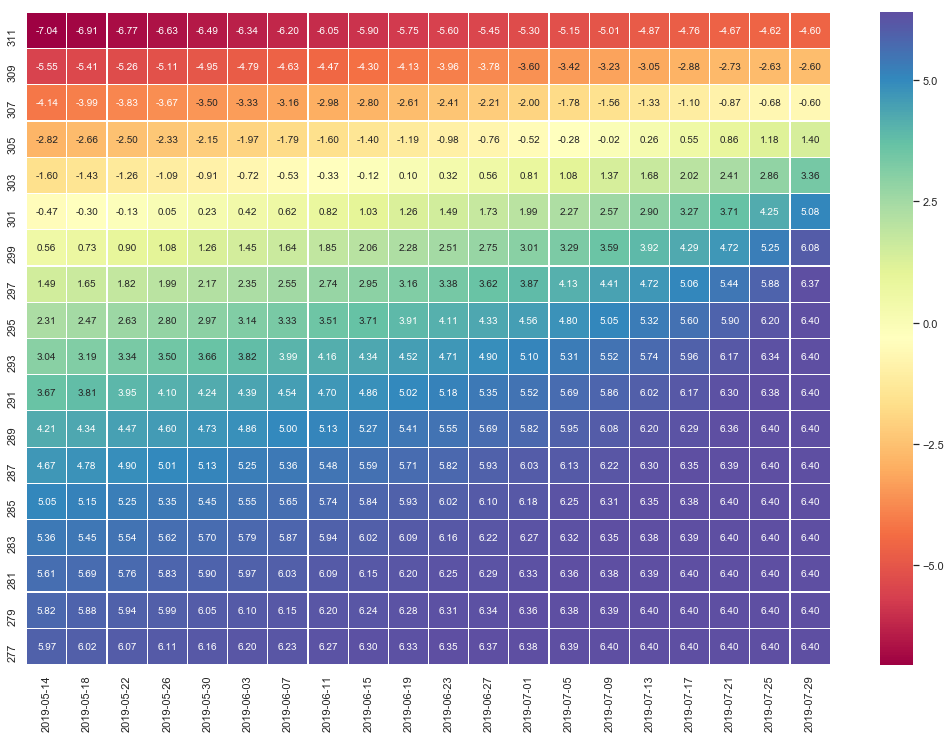

<Figure size 432x288 with 0 Axes>

In [9]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df1, annot = True, fmt = '4.2f', linewidths = .2, ax = ax, cmap = 'Spectral')
ax.invert_yaxis()

plt.figure()
plt.show()